In [726]:
import statsmodels.api as sm
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import operator
import datetime as dt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler



%matplotlib inline
warnings.filterwarnings('ignore')

In [1452]:
df = pd.read_csv('data/df2.csv')

In [1453]:
df.head()

,date,driver_id,gender,age,number_of_kids,online_hours,day_of_week,day_of_week_name
0,2017-06-01,111556,0,49,4,1.820833,3,Thursday
1,2017-06-02,111556,0,49,4,2.050000,4,Friday
2,2017-06-03,111556,0,49,4,0.000000,5,Saturday
3,2017-06-04,111556,0,49,4,0.000000,6,Sunday
4,2017-06-05,111556,0,49,4,3.812500,0,Monday


In [1454]:
df.index = pd.to_datetime(df.date)

df.drop(['date','day_of_week_name'],axis=1,inplace=True)

In [1455]:
df.head()

,driver_id,gender,age,number_of_kids,online_hours,day_of_week
date,,,,,,
2017-06-01,111556,0,49,4,1.820833,3
2017-06-02,111556,0,49,4,2.050000,4
2017-06-03,111556,0,49,4,0.000000,5
2017-06-04,111556,0,49,4,0.000000,6
2017-06-05,111556,0,49,4,3.812500,0


# Look for seasonality

In [ ]:
tmp = df.groupby(['date']).agg({'online_hours':'mean'})

In [ ]:
tmp.head(20)

In [1470]:
r = seasonal_decompose(tmp,model = 'additive')

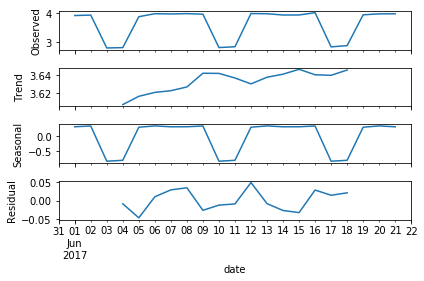

In [1471]:
r.plot();

In [1472]:
test2 = pd.read_csv('data/test2.csv')
test2.head()
# test2['date'] = pd.to_datetime(test2['date'])

,driver_id,date,online_hours,gender,age,number_of_kids,day_of_week
0,111556,2017-06-22,2,0,49,4,3
1,111556,2017-06-23,5,0,49,4,4
2,111556,2017-06-24,0,0,49,4,5
3,111556,2017-06-25,0,0,49,4,6
4,111556,2017-06-26,0,0,49,4,0


In [1473]:
test2.index = pd.to_datetime(test2.date)
test2.drop('date',axis=1,inplace=True)

In [1474]:
test2.sort_values(['driver_id', 'date'], ascending=[True, True],inplace=True)

In [1475]:
test2.head()

,driver_id,online_hours,gender,age,number_of_kids,day_of_week
date,,,,,,
2017-06-22,111556,2,0,49,4,3
2017-06-23,111556,5,0,49,4,4
2017-06-24,111556,0,0,49,4,5
2017-06-25,111556,0,0,49,4,6
2017-06-26,111556,0,0,49,4,0


# Auto arima

Lets use autoarima to find the best params for the sarimax model

In [1476]:
stepwise_model= auto_arima(tmp[['online_hours']],
                           start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=0,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,disp=-1)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=41.578, BIC=43.569, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=43.577, BIC=46.564, Fit time=0.030 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=43.559, BIC=46.546, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=41.787, BIC=45.769, Fit time=0.213 seconds
Total fit time: 0.

In [1477]:
stepwise_model.aic()

41.57772765961225

In [1478]:
stepwise_model.get_params()

{'callback': None,
 'disp': -1,
 'maxiter': 50,
 'method': None,
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 7),
 'solver': 'lbfgs',
 'start_params': None,
 'suppress_warnings': True,
 'transparams': True,
 'trend': None,
 'with_intercept': True}

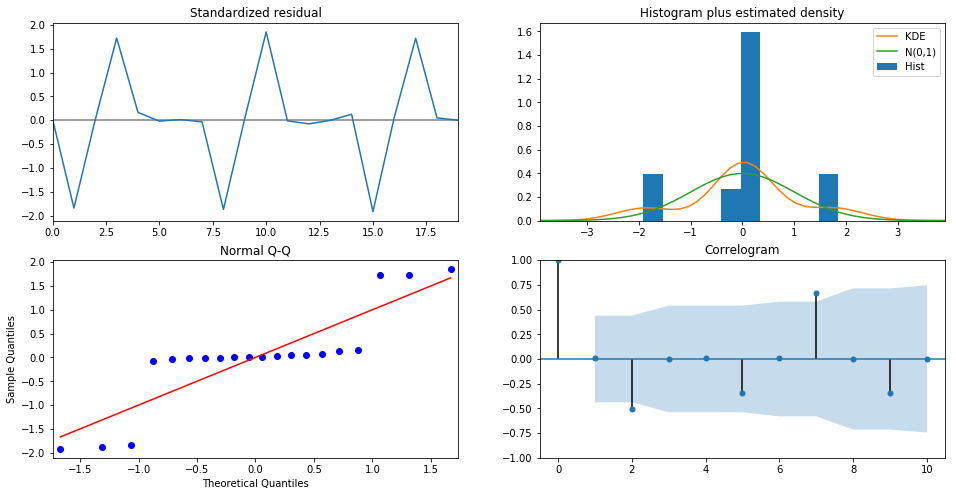

In [1479]:
stepwise_model.fit(tmp[['online_hours']])
stepwise_model.plot_diagnostics(figsize=(16, 8));

In [1480]:
test2_tmp = test2.groupby('date').agg({'online_hours':'mean'})

In [1481]:
test2_tmp

,online_hours
date,
2017-06-22,4.831997
2017-06-23,4.834403
2017-06-24,3.463111
2017-06-25,3.478749
2017-06-26,4.846030
2017-06-27,4.829992
2017-06-28,4.812751


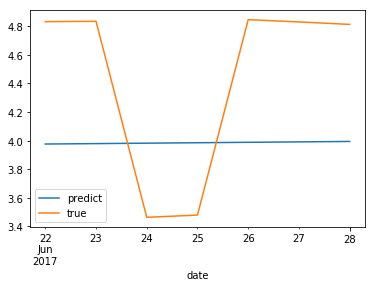

In [1483]:
plot_df.plot(kind = 'line')

In [1487]:
l = df_reindexed.driver_id.unique()[:10]
mean_rmse,rmse_list,overall_rmse = get_rmse(l,df_reindexed,test2)
print(mean_rmse)
print(overall_rmse)
print(rmse_list)

2.4792294005759294
2.5776894950994875
[2.449227073024506, 3.320372945560149, 2.1709300097806836, 3.218301406652633, 1.3114591736723473, 1.8250136333953808, 2.1529224058520384, 1.9676539041350019, 3.6699637001434136, 2.7064497535431395]


In [1143]:
l = df_reindexed.driver_id.unique()[:100]
mean_rmse,rmse_list,overall_rmse = get_rmse(l,df_reindexed,test2)

In [1488]:
print(mean_rmse)
print(overall_rmse)
print(rmse_list)

2.4792294005759294
2.5776894950994875
[2.449227073024506, 3.320372945560149, 2.1709300097806836, 3.218301406652633, 1.3114591736723473, 1.8250136333953808, 2.1529224058520384, 1.9676539041350019, 3.6699637001434136, 2.7064497535431395]


## Try sarimax

In [1489]:
#re-arrange test columns to follow df
test2= test2[df.columns]

In [1490]:
test2.head()

,driver_id,gender,age,number_of_kids,online_hours,day_of_week
date,,,,,,
2017-06-22,111556,0,49,4,2,3
2017-06-23,111556,0,49,4,5,4
2017-06-24,111556,0,49,4,0,5
2017-06-25,111556,0,49,4,0,6
2017-06-26,111556,0,49,4,0,0


In [1491]:
df.head()

,driver_id,gender,age,number_of_kids,online_hours,day_of_week
date,,,,,,
2017-06-01,111556,0,49,4,1.820833,3
2017-06-02,111556,0,49,4,2.050000,4
2017-06-03,111556,0,49,4,0.000000,5
2017-06-04,111556,0,49,4,0.000000,6
2017-06-05,111556,0,49,4,3.812500,0


In [1492]:
def create_data(df,test2):
    data = pd.concat([df, test2])
    return data

In [1493]:
data = create_data(df,test2)

In [1494]:
data.head()

,driver_id,gender,age,number_of_kids,online_hours,day_of_week
date,,,,,,
2017-06-01,111556,0,49,4,1.820833,3
2017-06-02,111556,0,49,4,2.050000,4
2017-06-03,111556,0,49,4,0.000000,5
2017-06-04,111556,0,49,4,0.000000,6
2017-06-05,111556,0,49,4,3.812500,0


In [1495]:
mod = sm.tsa.statespace.SARIMAX(data.loc['2017-06-01':'2017-06-21']['online_hours'],
                                exog=data.loc['2017-06-01':'2017-06-21'].loc[:,data.columns!='online_hours'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                )
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                      online_hours   No. Observations:                52017
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 7)   Log Likelihood             -113718.112
Date:                           Thu, 31 Jan 2019   AIC                         227452.225
Time:                                   16:32:32   BIC                         227523.098
Sample:                                        0   HQIC                        227474.385
                                         - 52017                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
driver_id      -4.339e-05   4.07e-05     -1.067      0.286      -0.000    3.63e-05
gender             1.4979      

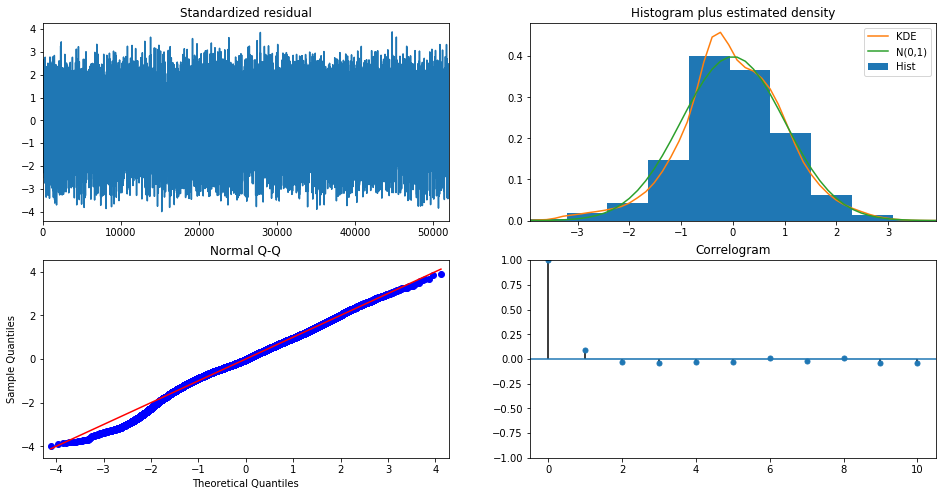

In [1496]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [1501]:
def sarimax_rmse(data,test2,start_date,end_date):
    true_all = []
    predicted_all = []
    rmse_list = []
    for i in data.driver_id.unique():
        df_tmp = data[data.driver_id==i]
        exog_train = df_tmp.loc['2017-06-01':'2017-06-21'].loc[:,df_tmp.columns!='online_hours']
        exog_pred = df_tmp.loc[start:end].loc[:,df_tmp.columns!='online_hours']
        mod = sm.tsa.statespace.SARIMAX(df_tmp.loc['2017-06-01':'2017-06-21']['online_hours'],
                                exog=exog_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                                
        results = mod.fit()
        p = results.get_prediction(start=pd.to_datetime(start), 
                           end= pd.to_datetime(end),
                           exog = exog_pred
                           )
        predicted = p.predicted_mean.apply(lambda x: 0 if x < 0 else x)
                                        
        test3 = test2[test2.driver_id==i]
        y_true = test3.online_hours
        test3.drop(['online_hours'],axis=1,inplace=True)

        true_all += list(y_true)
        predicted_all += list(predicted)
        rmse = np.sqrt(mean_squared_error(y_true,predicted))
        rmse_list.append(rmse)

    overall_rmse = np.sqrt(mean_squared_error(true_all,predicted_all))
    return np.mean(rmse_list),rmse_list,overall_rmse

In [1502]:
start = '2017-06-22'
end = '2017-06-28'
rmse, rmse_list,overall_rmse = sarimax_rmse(data,test2,start,end)
print("mean RMSE: {0}".format(rmse))
# print(" list of RMSE per driver: {0}".format(rmse_list[:10]))
print("Overall RMSE: {0} ".format(overall_rmse))

KeyboardInterrupt: 

# Use VAR
- Able to use 1 model for all driver ids
- however, difficult to transform exogeneous variables like gender, number_of_kids to fit data format 

In [520]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [686]:
#single multivariate model for all driver ID
tmp = df[df.driver_id.isin(l)]
tmp = tmp.reset_index()
tmp.head()
tmp = tmp[['date','driver_id','online_hours']]

tmp2 = test2[test2.driver_id.isin(l)]
tmp2 = tmp2.reset_index()
tmp2 = tmp2[['date','driver_id','online_hours']]

In [689]:
tmp = tmp.pivot(index='date', columns='driver_id', values='online_hours')
tmp = tmp.fillna(0)
tmp.head()

driver_id,111556,111575,111779,111839,112486,112609,112698,112730,113043,113140
date,,,,,,,,,,
2017-06-01,1.820833,5.725000,2.991667,7.120833,2.529167,7.104167,0.733333,3.858333,7.700000,6.612500
2017-06-02,2.050000,0.000000,2.912500,7.333333,3.054167,5.300000,2.054167,3.616667,5.054167,6.987500
2017-06-03,0.000000,0.000000,0.000000,6.804167,0.000000,4.266667,0.000000,0.000000,0.000000,5.387500
2017-06-04,0.000000,0.000000,0.000000,6.787500,0.000000,5.470833,5.454167,0.000000,0.000000,6.933333
2017-06-05,3.812500,3.329167,0.000000,6.783333,4.054167,4.325000,0.766667,0.000000,5.066667,1.145833


In [688]:
tmp2 = tmp2.pivot(index='date', columns='driver_id', values='online_hours')
tmp2 = tmp2.fillna(0)
tmp2.head()

driver_id,111556,111575,111779,111839,112486,112609,112698,112730,113043,113140
date,,,,,,,,,,
2017-06-22,2,9,2,8,1,4,3,5,7,10
2017-06-23,5,0,5,8,2,4,5,1,8,6
2017-06-24,0,0,0,9,0,6,0,0,0,6
2017-06-25,0,0,0,10,0,8,6,0,0,9
2017-06-26,0,9,0,9,5,6,5,0,8,0


In [698]:
def use_var(tmp,tmp2):
    model = VAR(endog=tmp)
    model_fit = model.fit()
    prediction = model_fit.forecast(model_fit.y, steps=len(tmp2))
    print(prediction)
    return prediction

In [699]:
prediction = use_var(tmp,tmp2)

[[  0.98937477  12.19574774   0.81227586   5.15900736  -0.65186909
    8.29509839  17.12597328   1.44512828   3.86288727  13.28368951]
 [  6.18101992  13.98197133   4.22051382   5.12797728   7.1330514
   -0.91339865 -11.01027327  -0.08605776  11.63417478  -0.28399776]
 [  2.45488418   4.26885416   6.3639629    3.67584399   2.59900658
    7.20257126  14.15407294   7.85962371   1.21319919  10.50083967]
 [  1.0463975    5.19772362   0.23324485   4.9880082    1.10650232
   -0.81819612  -6.94329448  -0.23473003   3.41208892   1.69367472]
 [  0.02288396   3.36259276   3.25232568   5.84243229   0.59318063
    8.81323349  14.42676575   3.67276935   2.61607507  12.50300375]
 [  2.91300347   6.10055133   0.24810828   6.0179155    3.3007075
    0.316827    -8.93215865  -1.36636153   5.26401038   1.23490503]
 [  1.19812305   2.01233735   3.391345     5.24369886   1.37333934
    7.64138714  13.61896531   4.39792762   2.25285153  10.28976146]]


In [692]:
len(prediction)

7

In [693]:
cols = tmp.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,len(l)):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = abs(round(prediction[i][j]))

In [694]:
pred

driver_id,111556,111575,111779,111839,112486,112609,112698,112730,113043,113140
0,1,12,1,5,1,8,17,1,4,13
1,6,14,4,5,7,1,11,0,12,0
2,2,4,6,4,3,7,14,8,1,11
3,1,5,0,5,1,1,7,0,3,2
4,0,3,3,6,1,9,14,4,3,13
5,3,6,0,6,3,0,9,1,5,1
6,1,2,3,5,1,8,14,4,2,10


In [695]:
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], tmp2[i])))

rmse value for 111556 is :  1.2535663410560174
rmse value for 111575 is :  6.391959234627741
rmse value for 111779 is :  2.7255405754769875
rmse value for 111839 is :  3.8913824205360674
rmse value for 112486 is :  3.0237157840738176
rmse value for 112609 is :  3.946064947695181
rmse value for 112698 is :  10.028530728448139
rmse value for 112730 is :  3.9641248358604595
rmse value for 113043 is :  3.2293298729878046
rmse value for 113140 is :  6.855654600401044
